# Word2Vec

We will implement word2vec using tenserflow.     
Word2vec is vector representation for words with similarity.

# Data

Lets take 10 sentence to create word vectors.

In [108]:
corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

# Remove stop words

In order to get better efficiency in creating word vectors, we will remove 
commonly used words.

In [109]:
def remove_stop_words(corpus):
    stop_words = ['is','a','will','be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
            
    return results

In [110]:
corpus = remove_stop_words(corpus)

In [111]:
corpus

['king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess young queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen']

In [112]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)
    
words = set(words)

In [113]:
words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

# Data generation

we will generate label for each word using skip gram

In [114]:
word2list = dict()

for i,word in enumerate(words):
    word2list[word] = i

word2list

{'princess': 0,
 'strong': 1,
 'man': 2,
 'queen': 3,
 'young': 4,
 'pretty': 5,
 'wise': 6,
 'king': 7,
 'girl': 8,
 'woman': 9,
 'prince': 10,
 'boy': 11}

In [115]:
sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
sentences

[['king', 'strong', 'man'],
 ['queen', 'wise', 'woman'],
 ['boy', 'young', 'man'],
 ['girl', 'young', 'woman'],
 ['prince', 'young', 'king'],
 ['princess', 'young', 'queen'],
 ['man', 'strong'],
 ['woman', 'pretty'],
 ['prince', 'boy', 'king'],
 ['princess', 'girl', 'queen']]

In [116]:
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx-WINDOW_SIZE, 0) : min(idx+WINDOW_SIZE, len(sentence))+1]:
            if neighbor != word:
                data.append([word, neighbor])
data

[['king', 'strong'],
 ['king', 'man'],
 ['strong', 'king'],
 ['strong', 'man'],
 ['man', 'king'],
 ['man', 'strong'],
 ['queen', 'wise'],
 ['queen', 'woman'],
 ['wise', 'queen'],
 ['wise', 'woman'],
 ['woman', 'queen'],
 ['woman', 'wise'],
 ['boy', 'young'],
 ['boy', 'man'],
 ['young', 'boy'],
 ['young', 'man'],
 ['man', 'boy'],
 ['man', 'young'],
 ['girl', 'young'],
 ['girl', 'woman'],
 ['young', 'girl'],
 ['young', 'woman'],
 ['woman', 'girl'],
 ['woman', 'young'],
 ['prince', 'young'],
 ['prince', 'king'],
 ['young', 'prince'],
 ['young', 'king'],
 ['king', 'prince'],
 ['king', 'young'],
 ['princess', 'young'],
 ['princess', 'queen'],
 ['young', 'princess'],
 ['young', 'queen'],
 ['queen', 'princess'],
 ['queen', 'young'],
 ['man', 'strong'],
 ['strong', 'man'],
 ['woman', 'pretty'],
 ['pretty', 'woman'],
 ['prince', 'boy'],
 ['prince', 'king'],
 ['boy', 'prince'],
 ['boy', 'king'],
 ['king', 'prince'],
 ['king', 'boy'],
 ['princess', 'girl'],
 ['princess', 'queen'],
 ['girl', 'prin

In [117]:
import pandas as pd

data = pd.DataFrame(data, columns = ['input', 'label'])
data.head(10)

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [118]:
data.shape

(52, 2)

In [119]:
word2list

{'princess': 0,
 'strong': 1,
 'man': 2,
 'queen': 3,
 'young': 4,
 'pretty': 5,
 'wise': 6,
 'king': 7,
 'girl': 8,
 'woman': 9,
 'prince': 10,
 'boy': 11}

# Tensorflow Background

Created by the Google Brain team, TensorFlow is an open source library for numerical computation and large-scale machine learning. TensorFlow bundles together a slew of machine learning and deep learning (aka neural networking) models and algorithms and makes them useful by way of a common metaphor. It uses Python to provide a convenient front-end API for building applications with the framework, while executing those applications in high-performance C++.

# Define Tensorflow Graph

In [120]:
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words)

#function to convert numbers to one hot vectors.
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

In [121]:
X = [] #input word
Y = [] #target word

for x,y in zip(data['input'],data['label']):
    X.append(to_one_hot_encoding(word2list[x]))
    Y.append(to_one_hot_encoding(word2list[y]))


for eg. array will look like this for each word vector.   
>[array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])]


In [122]:
# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

# Training

In [123]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

iteration = 20000
for i in range(iteration):
    sess.run(train_op, feed_dict = {x:X_train,y_label: Y_train})
    if i%3000 == 0:
        print('iteration '+str(i)+' loss is :'
              , sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is : 6.9560146
iteration 3000 loss is : 1.8575246
iteration 6000 loss is : 1.7963128
iteration 9000 loss is : 1.7772715
iteration 12000 loss is : 1.7663574
iteration 15000 loss is : 1.7585995
iteration 18000 loss is : 1.7525278


In [124]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[ 4.6435800e+00 -3.6385357e-01]
 [ 1.7935408e+00  7.3122091e+00]
 [-2.8074062e-01  1.1841531e+00]
 [ 1.4608357e+00 -7.7205062e-02]
 [ 2.4104774e-01  2.2964430e-01]
 [ 4.4114904e+00  9.4281965e-01]
 [ 5.7495522e+00  6.9440842e-02]
 [ 2.5525093e-03  1.1051342e+00]
 [ 4.4709435e+00  4.5488703e-01]
 [ 9.5296693e-01 -4.6276772e-01]
 [ 3.0659592e-01  3.3355610e+00]
 [ 1.3099253e+00  3.9555650e+00]]


# Word vector in table

In [125]:
w2v_df = pd.DataFrame(vectors, columns = ['x1','x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word','x1','x2']]
w2v_df

,word,x1,x2
0,princess,4.643580,-0.363854
1,strong,1.793541,7.312209
2,man,-0.280741,1.184153
3,queen,1.460836,-0.077205
4,young,0.241048,0.229644
5,pretty,4.411490,0.942820
6,wise,5.749552,0.069441
7,king,0.002553,1.105134
8,girl,4.470943,0.454887
9,woman,0.952967,-0.462768


# Word vector in 2D chart

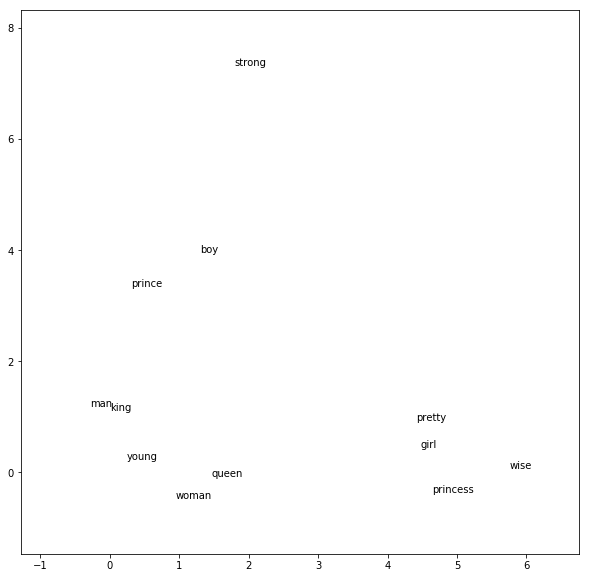

In [131]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()